# Poker Hand Classification using Machine Learning

**Dataset:** UCI Poker Hand Dataset  
**Goal:** Analyze and classify poker hands (0–9) using machine learning.

---

## Section 1: Data Loading & Structure
We will load the dataset, assign column names, and briefly inspect its structure.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("../data/poker-hand-training-true.csv", header=None)
test = pd.read_csv("../data/poker-hand-testing.csv", header=None)

columns = ["S1","C1","S2","C2","S3","C3","S4","C4","S5","C5","Class"]
train.columns = columns
test.columns = columns

print("Training Data Sample:")
print(train.head(), "\n")

print("Training shape:", train.shape)
print("Testing shape:", test.shape)

print("\nData Types:")
print(train.dtypes)

print("\nSummary Statistics:")
print(train.describe())


Training Data Sample:
   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  Class
0   1  10   1  11   1  13   1  12   1   1      9
1   2  11   2  13   2  10   2  12   2   1      9
2   3  12   3  11   3  13   3  10   3   1      9
3   4  10   4  11   4   1   4  13   4  12      9
4   4   1   4  13   4  12   4  11   4  10      9 

Training shape: (25010, 11)
Testing shape: (1000000, 11)

Data Types:
S1       int64
C1       int64
S2       int64
C2       int64
S3       int64
C3       int64
S4       int64
C4       int64
S5       int64
C5       int64
Class    int64
dtype: object

Summary Statistics:
                 S1            C1            S2            C2            S3  \
count  25010.000000  25010.000000  25010.000000  25010.000000  25010.000000   
mean       2.508756      6.995242      2.497721      7.014194      2.510236   
std        1.116483      3.749805      1.121767      3.766974      1.123148   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.0000

/var/folders/wm/ylvwmbwx5qdd1c1dtgv0ns0c0000gn/T/ipykernel_95004/2202635146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train["Class"], palette="viridis")


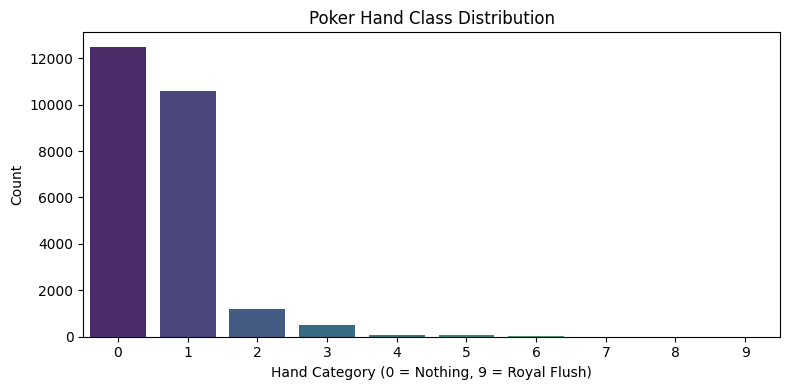

In [2]:
plt.figure(figsize=(8,4))
sns.countplot(x=train["Class"], palette="viridis")
plt.title("Poker Hand Class Distribution")
plt.xlabel("Hand Category (0 = Nothing, 9 = Royal Flush)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../visuals/class_distribution.png")  
plt.show()


/var/folders/wm/ylvwmbwx5qdd1c1dtgv0ns0c0000gn/T/ipykernel_95004/1420999589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train["S1"], ax=axes[0], palette="pastel")
/var/folders/wm/ylvwmbwx5qdd1c1dtgv0ns0c0000gn/T/ipykernel_95004/1420999589.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train["C1"], ax=axes[1], palette="rocket")


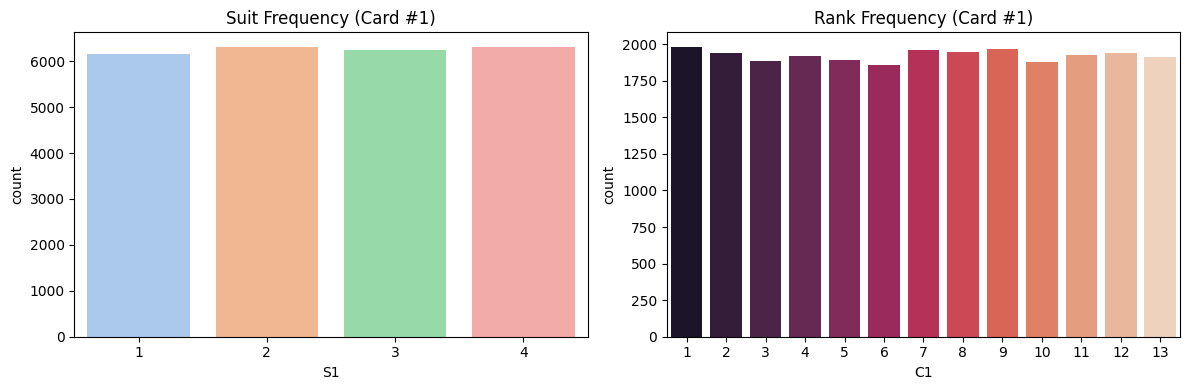

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(x=train["S1"], ax=axes[0], palette="pastel")
axes[0].set_title("Suit Frequency (Card #1)")

sns.countplot(x=train["C1"], ax=axes[1], palette="rocket")
axes[1].set_title("Rank Frequency (Card #1)")

plt.tight_layout()
plt.savefig("../visuals/suit_rank_distribution.png")
plt.show()


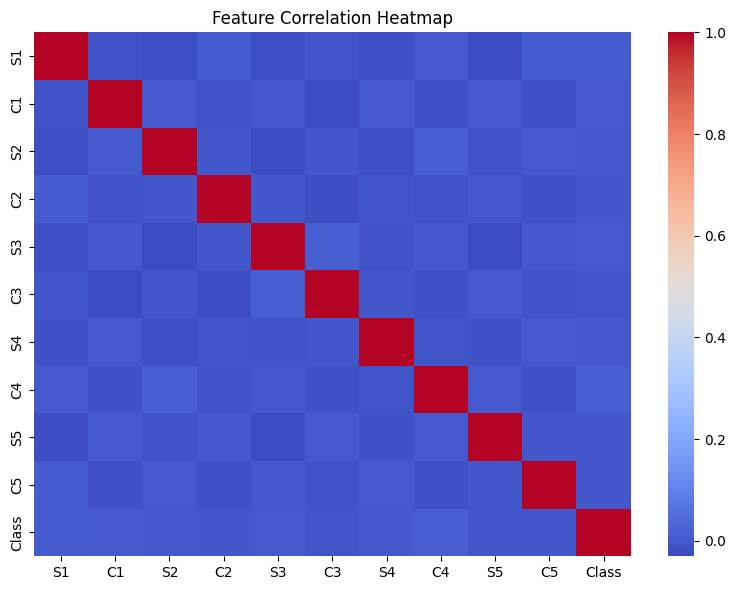

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("../visuals/correlation_heatmap.png")
plt.show()


## Section 2: Preprocessing

In this section, we prepare the data for machine learning:
- Separate features (X) and labels (y)
- Create a train/validation split from the training data
- Scale features using StandardScaler (important for KNN and Logistic Regression)


Training/Validation Split

In [5]:
from sklearn.model_selection import train_test_split

# Separate features (all columns except Class) and label (Class)
X = train.drop("Class", axis=1)
y = train["Class"]

print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

# Split the original training set into train and validation sets
# e.g., 80% training, 20% validation
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train:", X_train.shape)
print("X_valid:", X_valid.shape)
print("y_train:", y_train.shape)
print("y_valid:", y_valid.shape)


Feature matrix shape: (25010, 10)
Label vector shape: (25010,)
X_train: (20008, 10)
X_valid: (5002, 10)
y_train: (20008,)
y_valid: (5002,)


Scaling features

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training features only, then transform
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Also prepare a scaled version of the original test set for later final evaluation
X_test = test.drop("Class", axis=1)
y_test = test["Class"]

X_test_scaled = scaler.transform(X_test)

print("Scaled X_train shape:", X_train_scaled.shape)
print("Scaled X_valid shape:", X_valid_scaled.shape)
print("Scaled X_test shape:", X_test_scaled.shape)


Scaled X_train shape: (20008, 10)
Scaled X_valid shape: (5002, 10)
Scaled X_test shape: (1000000, 10)


Checking clas balance in training and validation set

In [7]:
print("Training class distribution:")
print(y_train.value_counts(normalize=True))

print("\nValidation class distribution:")
print(y_valid.value_counts(normalize=True))


Training class distribution:
Class
0    0.499500
1    0.423780
2    0.048231
3    0.020542
4    0.003699
5    0.002149
6    0.001449
7    0.000250
9    0.000200
8    0.000200
Name: proportion, dtype: float64

Validation class distribution:
Class
0    0.499600
1    0.423830
2    0.048181
3    0.020392
4    0.003798
5    0.002199
6    0.001399
7    0.000200
8    0.000200
9    0.000200
Name: proportion, dtype: float64


## Section 3: Model 1 — K-Nearest Neighbors (KNN)

In this section, we train a KNN classifier to predict the poker hand class (0–9)
using the scaled card features. KNN classifies a sample based on the majority
class of its k nearest neighbors in feature space.


Baseline KNN Model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Baseline KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_valid_pred_knn = knn.predict(X_valid_scaled)

knn_valid_acc = accuracy_score(y_valid, y_valid_pred_knn)
print(f"KNN (k=5) Validation Accuracy: {knn_valid_acc:.4f}")


KNN (k=5) Validation Accuracy: 0.5078


Classification Report

In [9]:
print("KNN (k=5) Classification Report (Validation Set):")
print(classification_report(y_valid, y_valid_pred_knn))


KNN (k=5) Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.54      0.64      0.59      2499
           1       0.46      0.44      0.45      2120
           2       0.04      0.00      0.01       241
           3       0.00      0.00      0.00       102
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.51      5002
   macro avg       0.10      0.11      0.10      5002
weighted avg       0.47      0.51      0.49      5002



/Users/andy/Desktop/ML-Project-Poker/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/andy/Desktop/ML-Project-Poker/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/andy/Desktop/ML-Project-Poker/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

Confusion Matrix

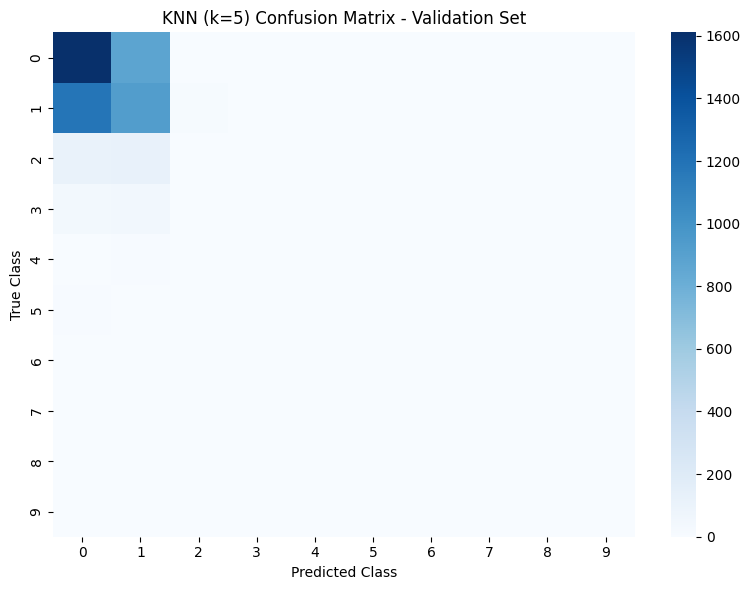

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cm_knn = confusion_matrix(y_valid, y_valid_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=False, cmap="Blues")
plt.title("KNN (k=5) Confusion Matrix - Validation Set")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.tight_layout()
plt.savefig("../visuals/confusion_matrix_knn_k5.png")
plt.show()


K-value comparison

k = 1: Validation Accuracy = 0.4744
k = 3: Validation Accuracy = 0.4990
k = 5: Validation Accuracy = 0.5078
k = 7: Validation Accuracy = 0.5124
k = 9: Validation Accuracy = 0.5264
k = 11: Validation Accuracy = 0.5216


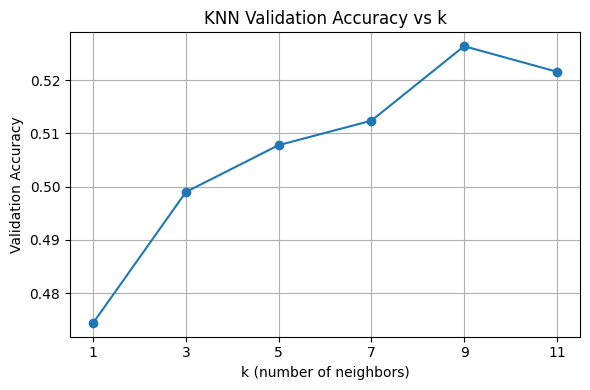

In [11]:
k_values = [1, 3, 5, 7, 9, 11]
valid_accuracies = []

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train_scaled, y_train)
    y_valid_pred_k = knn_k.predict(X_valid_scaled)
    acc_k = accuracy_score(y_valid, y_valid_pred_k)
    valid_accuracies.append(acc_k)
    print(f"k = {k}: Validation Accuracy = {acc_k:.4f}")

# Optional: plot accuracy vs k
plt.figure(figsize=(6,4))
plt.plot(k_values, valid_accuracies, marker="o")
plt.title("KNN Validation Accuracy vs k")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Validation Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.savefig("../visuals/knn_k_vs_accuracy.png")
plt.show()


Best KNN

In [12]:
best_k = 9

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

y_test_pred_knn = knn_best.predict(X_test_scaled)

test_acc_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"KNN (k={best_k}) Test Accuracy: {test_acc_knn:.4f}")


KNN (k=9) Test Accuracy: 0.5198


## Section 4: Model 2 — Logistic Regression

In this section, we train a multinomial Logistic Regression model to classify
poker hands using the same scaled features. Logistic Regression learns a linear
decision boundary and is a common baseline for multiclass classification.


Train Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create multinomial Logistic Regression model
log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    n_jobs=-1
)

# Train on scaled training data
log_reg.fit(X_train_scaled, y_train)

# Predict on validation data
y_valid_pred_log = log_reg.predict(X_valid_scaled)

# Compute validation accuracy
log_valid_acc = accuracy_score(y_valid, y_valid_pred_log)
print(f"Logistic Regression Validation Accuracy: {log_valid_acc:.4f}")


/Users/andy/Desktop/ML-Project-Poker/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Validation Accuracy: 0.4996


Classification

In [14]:
print("Logistic Regression Classification Report (Validation Set):")
print(classification_report(y_valid, y_valid_pred_log))


Logistic Regression Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2499
           1       0.00      0.00      0.00      2120
           2       0.00      0.00      0.00       241
           3       0.00      0.00      0.00       102
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.50      5002
   macro avg       0.05      0.10      0.07      5002
weighted avg       0.25      0.50      0.33      5002



/Users/andy/Desktop/ML-Project-Poker/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/andy/Desktop/ML-Project-Poker/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/andy/Desktop/ML-Project-Poker/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

Confusion Matrix Heat Map

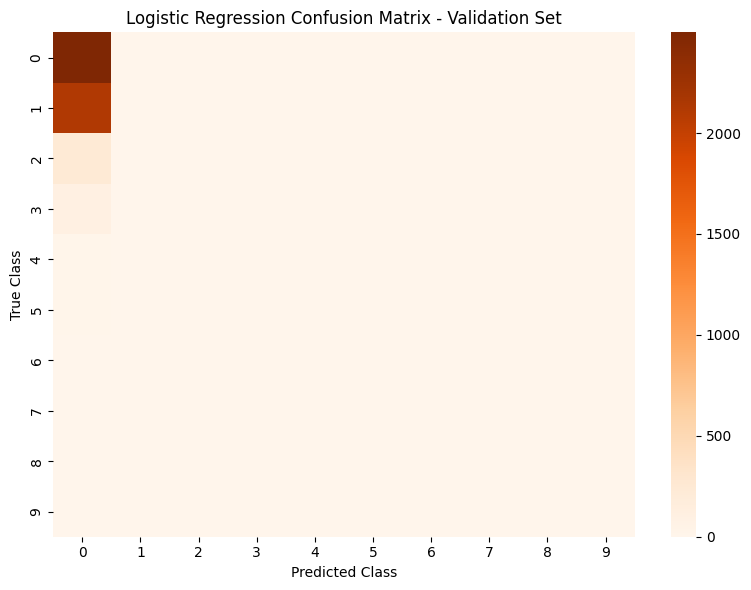

In [15]:
cm_log = confusion_matrix(y_valid, y_valid_pred_log)

plt.figure(figsize=(8,6))
sns.heatmap(cm_log, annot=False, cmap="Oranges")
plt.title("Logistic Regression Confusion Matrix - Validation Set")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.tight_layout()
plt.savefig("../visuals/confusion_matrix_logreg.png")
plt.show()


Test Accuracy

In [16]:
y_test_pred_log = log_reg.predict(X_test_scaled)

test_acc_log = accuracy_score(y_test, y_test_pred_log)
print(f"Logistic Regression Test Accuracy: {test_acc_log:.4f}")


Logistic Regression Test Accuracy: 0.5012
